#### importing the libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### importing the dataset

In [96]:
dataset = pd.read_csv('Position_Salaries.csv')

In [98]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [100]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [102]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [104]:
# özellik ölçeklendirme kullanılır. çünkü, SVR modelinde bağımlı değişkenin özelliklere göre açık bir denklemi yok.
# her bir özelliği çarpan ve bu nedenle yüksek değerler alan özellikler için daha düşük değerlere telafi etmeyen katsayılar yok.

In [106]:
# y değerlerini 2 boyutlu dizi formatına çevirmemiz gerek.
# bunun nedeni, standardizasyonu gerçekleştirecek olan standart ölçek sınıfının, yani
# özellik ölçeklemenin girdisinde tek bir benzersiz format beklediğini biliyor olmalıyız.
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

#### feature scaling

In [109]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
# özellikler ve bağımlı değişken aynı standart sapma ya da ortalamaya sahip olmadığından her biri için ayrı ayrı object oluşturulmalı.
# çünkü, 
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [111]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [113]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

#### Training the SVR model on the whole dataset

In [116]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

#### predicting a new result

In [119]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

#### Visualising the SVR results

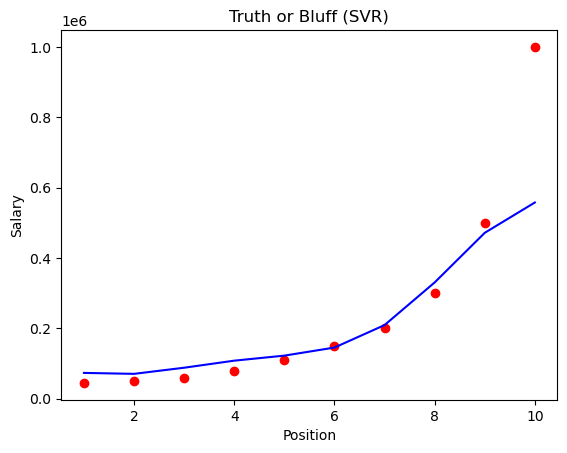

In [122]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

#### Visualising the SVR results (for higher resolution and smoother curse)

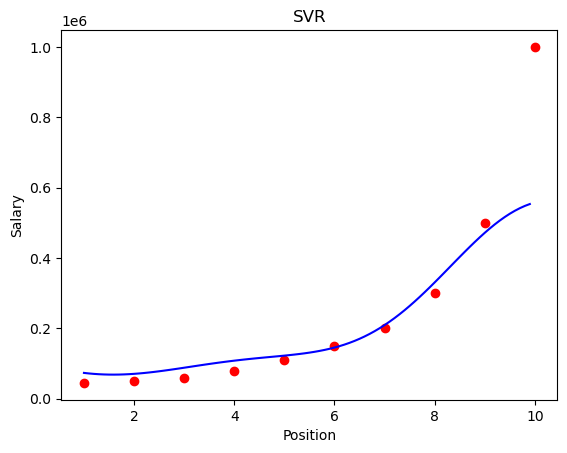

In [125]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color= 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color='blue')
plt.title('SVR')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()